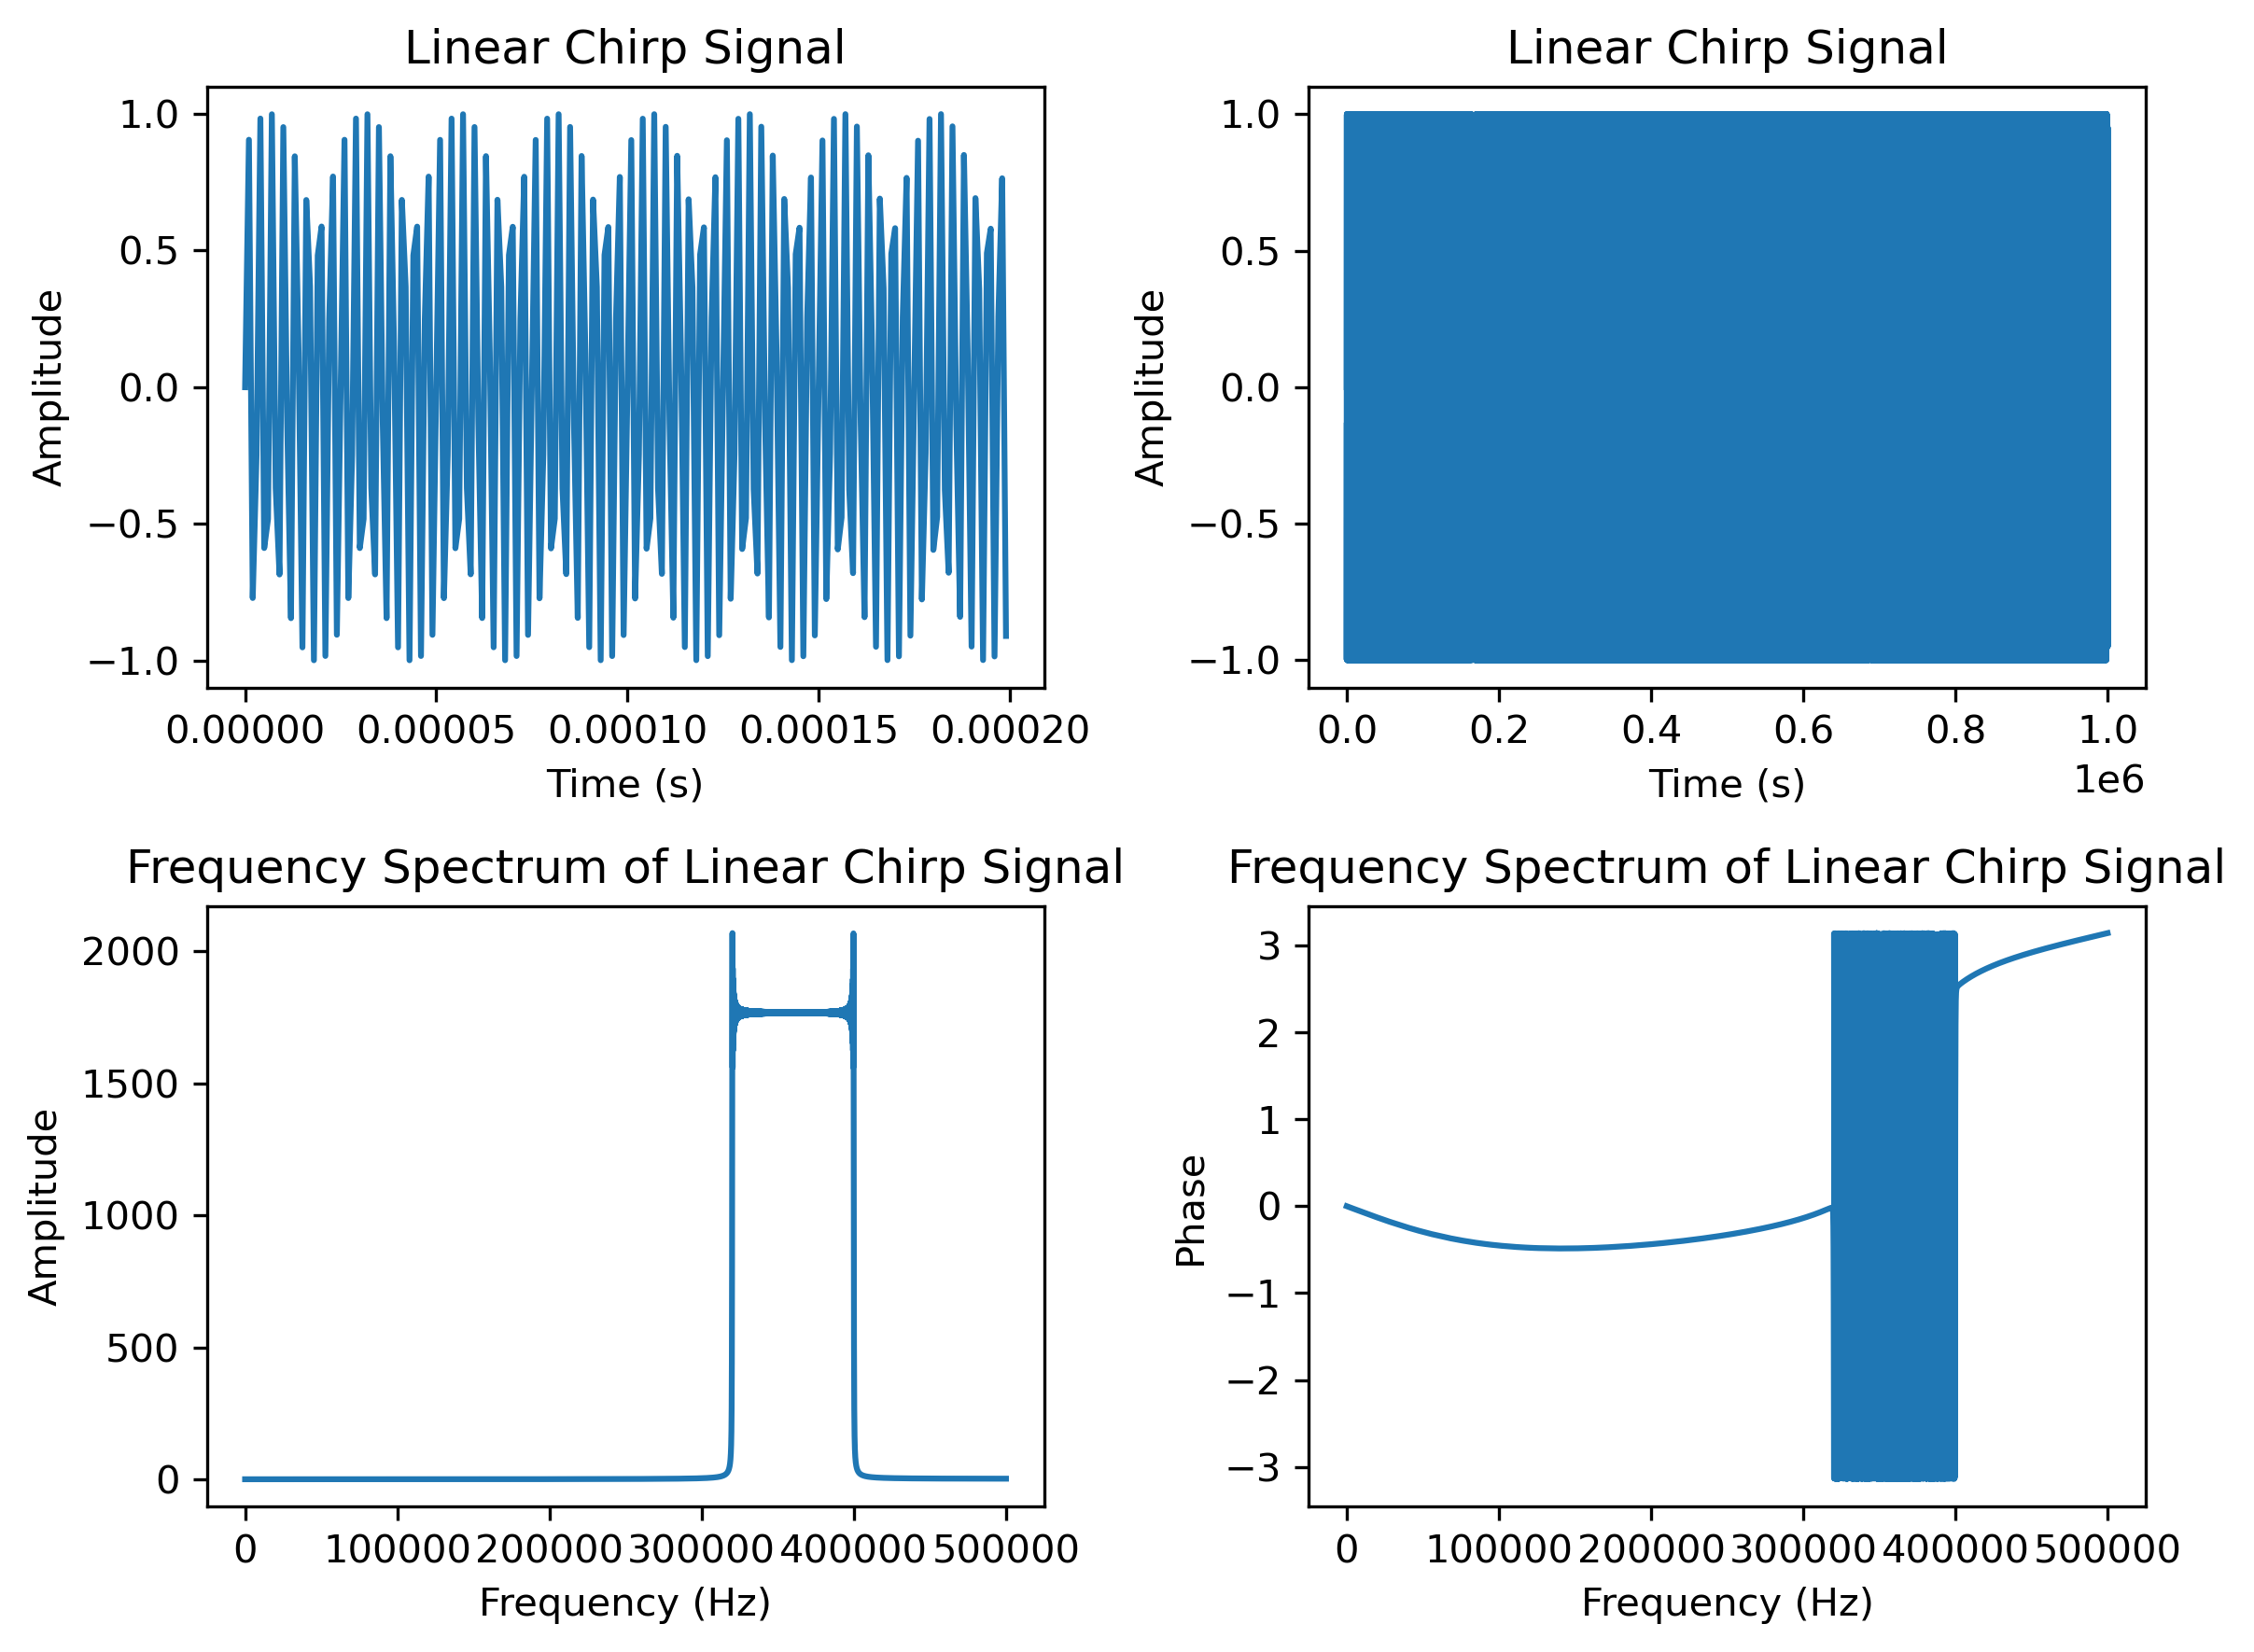

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Define the time range
duration = 1  # 1 second
sample_rate = 1000000/duration  # Sampling rate (samples per second)
time = np.linspace(0, duration, int(sample_rate * duration)) #start ,stop, num


# Define the parameters for the linear chirp signal
start_freq = 320*1000  # Starting frequency in Hz
end_freq = 400*1000 # Ending frequency in Hz

# Generate the linear chirp signal
chirp_signal = np.sin(2 * np.pi * start_freq * time + (np.pi * (end_freq - start_freq) * time**2) / duration**2)


# Apply a moving average smoothing
window_size = 1  # Adjust the size of the moving average window
smoothed_chirp_signal = np.convolve(chirp_signal, np.ones(window_size) / window_size, mode='same')

chirp_signal = smoothed_chirp_signal
# Perform FFT on the chirp signal
fft_result = fft(chirp_signal)
frequencies_fft = np.fft.fftfreq(len(fft_result), d=(time[1] - time[0]))

# Calculate the magnitude of the FFT result
magnitude = np.abs(fft_result[frequencies_fft>=0])
phase = np.angle(fft_result[frequencies_fft>=0])

# Plot the linear chirp signal (amplitude vs. time)
plt.figure(figsize=(8, 6), dpi=300)
plt.subplot(2, 2, 1)
plt.plot(time[0:200], chirp_signal[0:200])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Linear Chirp Signal')

plt.subplot(2, 2, 2)
plt.plot(chirp_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Linear Chirp Signal')

# Plot the frequency spectrum of the linear chirp signal
plt.subplot(2, 2, 3)
plt.plot(frequencies_fft[frequencies_fft>=0], magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Linear Chirp Signal')

# Plot the frequency spectrum of the linear chirp signal
plt.subplot(2, 2, 4)
plt.plot(frequencies_fft[frequencies_fft>=0], phase)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.title('Frequency Spectrum of Linear Chirp Signal')

plt.tight_layout()
plt.show()